Simple Linear Regression Basics
Allows us to understand relationship between two continuous variables
* Example
  * x: independent variable
    * weight
  * y: dependent variable
    * height
* y = \alpha x + \beta



Aim of Linear Regression
* Minimize the distance between the points and the line (y = \alpha x + \beta)
* Adjusting
    * Coefficient: \alpha
    * Bias/intercept: \beta


# Linear Regression Model with Pytorch

In [1]:
import torch
import numpy as np

In [2]:
x_values = [i for i in range(11)]
print(x_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [3]:
x_train = np.array(x_values,dtype=np.float32)
x_train.shape

(11,)

In [4]:
x_train[1]

1.0

In [5]:
#If you don't this you will get an error stating you need 2D. Simply just reshape accordingly if you ever face such errors down the road.


# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [6]:
x_train[1]

array([1.], dtype=float32)

In [7]:
# Suppose function is y = 2x +1

y_values = [2*i for i in x_values]
y_values

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [8]:
# y_values = []
# for i in x_values:
#     result = 2*i + 1
#     y_values.append(result)
# y_values

In [9]:
y_train = np.array(y_values,dtype=np.float32)
y_train.shape

(11,)

In [10]:
y_train = y_train.reshape(-1,1)
y_train.shape

(11, 1)

# Model Creation

In [11]:
import torch
import torch.nn as nn

1. Linear model
   * True Equation: y = 2x + 1
2. Forward
  * Example
Input x = 1,
Output \hat y = ?

In [12]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

In [13]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim,output_dim)

In [14]:
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [15]:
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy to tensors
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)
    
    # Clear gradient w.r.t paramters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calc Loss
    loss = criterion(outputs,labels)
    #Getting gradients w.r.t parameters
    loss.backward()
    
    #Update paramters
    optimizer.step()
    
    print('epoch {},loss{}'.format(epoch,loss.item()))

epoch 1,loss193.30284118652344
epoch 2,loss15.911920547485352
epoch 3,loss1.441087245941162
epoch 4,loss0.25914672017097473
epoch 5,loss0.16115888953208923
epoch 6,loss0.1516026258468628
epoch 7,loss0.14927707612514496
epoch 8,loss0.14755846560001373
epoch 9,loss0.14590658247470856
epoch 10,loss0.14427681267261505
epoch 11,loss0.14266586303710938
epoch 12,loss0.14107254147529602
epoch 13,loss0.1394972950220108
epoch 14,loss0.13793963193893433
epoch 15,loss0.13639910519123077
epoch 16,loss0.13487601280212402
epoch 17,loss0.13336989283561707
epoch 18,loss0.1318807303905487
epoch 19,loss0.13040791451931
epoch 20,loss0.1289515644311905
epoch 21,loss0.12751160562038422
epoch 22,loss0.12608781456947327
epoch 23,loss0.12467977404594421
epoch 24,loss0.12328753620386124
epoch 25,loss0.12191072106361389
epoch 26,loss0.12054936587810516
epoch 27,loss0.11920326203107834
epoch 28,loss0.11787211149930954
epoch 29,loss0.11655572056770325
epoch 30,loss0.11525421589612961
epoch 31,loss0.113967202603816

In [18]:
# Purely inference
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
predicted

array([[ 0.4262797],
       [ 2.3648915],
       [ 4.3035035],
       [ 6.242115 ],
       [ 8.180727 ],
       [10.119339 ],
       [12.057951 ],
       [13.996563 ],
       [15.935175 ],
       [17.873785 ],
       [19.812397 ]], dtype=float32)

In [19]:
# y = 2x + 1 
y_train

array([[ 0.],
       [ 2.],
       [ 4.],
       [ 6.],
       [ 8.],
       [10.],
       [12.],
       [14.],
       [16.],
       [18.],
       [20.]], dtype=float32)

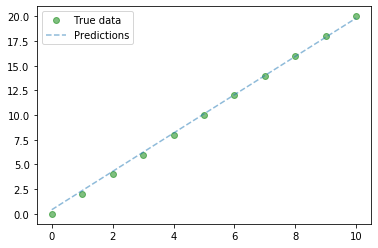

In [21]:
import matplotlib.pyplot as plt
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

## Save Model

In [22]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

## Load Model

In [24]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

# GPU Version

* Just remember always 2 things must be on GPU
    * model
    * tensors

In [25]:
import torch
import torch.nn as nn
import numpy as np

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable

    #######################
    #  USE GPU FOR MODEL  #
    #######################
    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    # Logging
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 69.49633026123047
epoch 2, loss 5.696641445159912
epoch 3, loss 0.49239107966423035
epoch 4, loss 0.06758671253919601
epoch 5, loss 0.03263082727789879
epoch 6, loss 0.02947675995528698
epoch 7, loss 0.028920035809278488
epoch 8, loss 0.0285784974694252
epoch 9, loss 0.028257863596081734
epoch 10, loss 0.027942122891545296
epoch 11, loss 0.0276301521807909
epoch 12, loss 0.027321545407176018
epoch 13, loss 0.02701651304960251
epoch 14, loss 0.026714831590652466
epoch 15, loss 0.026416487991809845
epoch 16, loss 0.02612154372036457
epoch 17, loss 0.025829775258898735
epoch 18, loss 0.025541378185153008
epoch 19, loss 0.02525620348751545
epoch 20, loss 0.024974102154374123
epoch 21, loss 0.02469526417553425
epoch 22, loss 0.02441946417093277
epoch 23, loss 0.02414676547050476
epoch 24, loss 0.023877225816249847
epoch 25, loss 0.023610495030879974
epoch 26, loss 0.02334686368703842
epoch 27, loss 0.023086143657565117
epoch 28, loss 0.022828297689557076
epoch 29, loss 0.02257